In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter
from pyclustering.cluster.rock import rock
from pyclustering.cluster import cluster_visualizer
from src.utils_clustering import *
import pandas as pd

import time

In [3]:
N_CLASSES = 15

In [4]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
data = pd.read_csv(file_path, header=None, sep='\s+', names=['X', 'Y'])

# Assuming the dataset is already in a suitable format (two columns for X and Y coordinates)
# If your dataset includes headers or other non-numeric rows, make sure to preprocess it accordingly.
processed_data = data.values.tolist()
processed_data[:5]

[['X,Y', nan],
 ['0.6839115353098769,0.5435036726527372', nan],
 ['0.6857011238531137,0.5511360485409973', nan],
 ['0.6128098875297734,0.5702447166538899', nan],
 ['0.6355533713470528,0.5440473666182779', nan]]

In [5]:
# Remove the first entry if it's a header or non-numeric
if processed_data[0][0] == 'X,Y':
    raw_data = processed_data[1:]

# Split the string by comma and convert to float, ignore the second column as it's NaN
processed_data = [[float(coord) for coord in point[0].split(',')] for point in raw_data]
processed_data[:5]

[[0.6839115353098769, 0.5435036726527372],
 [0.6857011238531137, 0.5511360485409973],
 [0.6128098875297734, 0.5702447166538899],
 [0.6355533713470528, 0.5440473666182779],
 [0.6536933880753538, 0.6055935235174825]]

In [6]:
# Parameters for ROCK
eps = 0.5  # Threshold for the similarity function (the higher, the more strict)
number_of_clusters = 15  # Desired number of clusters

In [7]:
# Start measuring time
start_time = time.time()

rock_instance = rock(processed_data, eps, number_of_clusters)  # Use ccore for faster computation
# Run clustering
rock_instance.process()

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

In [9]:
# Extract results
clusters = rock_instance.get_clusters()

# Converting cluster lists to label form
labels_pred = np.zeros(len(data), dtype=int)
for cluster_id, cluster in enumerate(clusters, start=1):
    for index in cluster:
        labels_pred[index] = cluster_id

In [10]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({1: 4986, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 0: 1})


In [21]:
len(labels_pred)

5001

In [22]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', 5000)
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [23]:
clustering_algorithm_name = 'rock_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

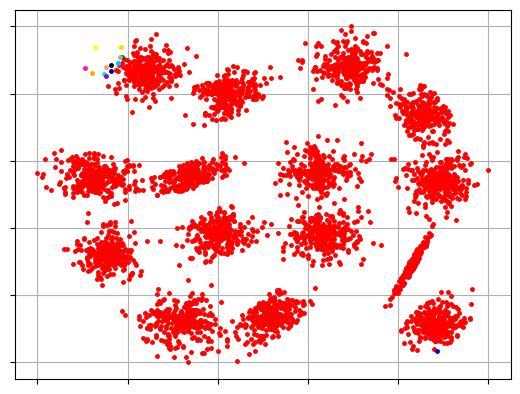

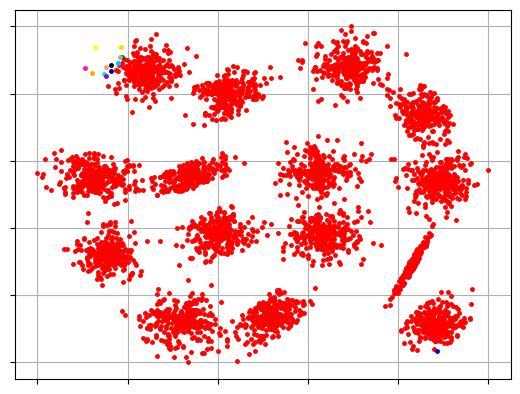

In [30]:
# Visualization
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, processed_data)
visualizer.show()

In [26]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred[:5000])

Confusion Matrix:


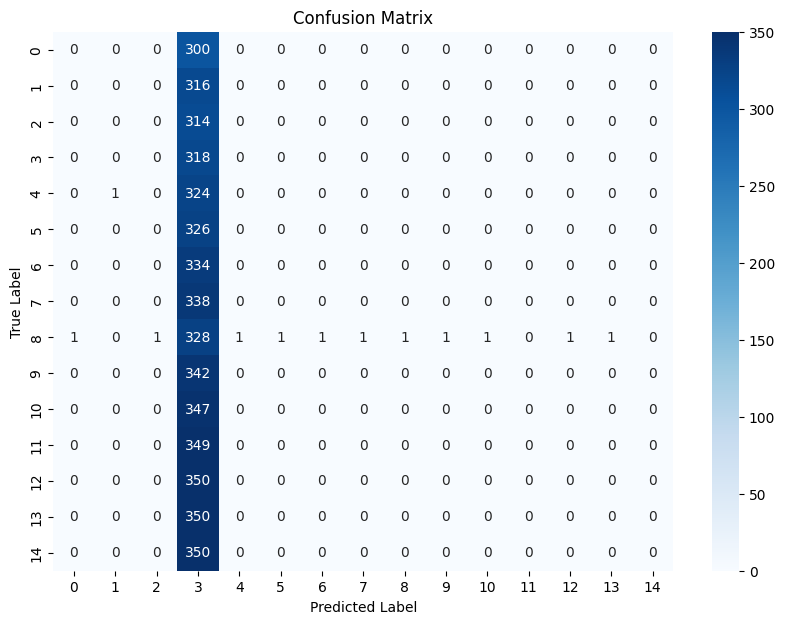


Overall Accuracy: 6.38%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [27]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [28]:
algorithm_params = ""
algorithm_details = str(algorithm_params)

In [29]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 12:51:50.708110
Dataset: s1
Clustering Algorithm: rock_clustering
Algorithm Details: 
Running Time (seconds): 623.5756180286407
Accuracy: 0.0638
